<a href="https://colab.research.google.com/github/kinyy999/kinan/blob/main/kinan_abusalh_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

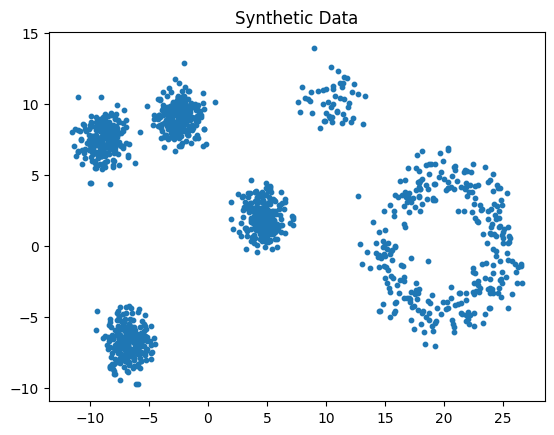

In [2]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Synthetic Data")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


min_clusters = 2
max_clusters = 20
kmeans = KMeans(n_clusters=10, max_iter=50, n_init=100)
labels = kmeans.fit_predict(X)

if len(set(labels)) > 1:
    kmeans_score = silhouette_score(X, labels)

print("Number of Clusters (k):", 10)
print("Silhouette Score:", kmeans_score)

Number of Clusters (k): 10
Silhouette Score: 0.7119483967066037


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

best_silhouette_score = -1
best_n_clusters = -1
min_clusters = 2
max_clusters = 15
linkage = 'ward'
metric = 'euclidean'

for n_clusters in range(min_clusters, max_clusters + 1):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)

    agg_labels = agg_clustering.fit_predict(X)
    num_clusters = len(set(agg_labels))

    if num_clusters > 1:
        score = silhouette_score(X, agg_labels)

        if score > best_silhouette_score:
            best_silhouette_score = score
            best_n_clusters = n_clusters

Agglomerative_Score= best_silhouette_score
best_agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=linkage, metric=metric)
best_agglomerative.fit(X)

print(f"Best n_clusters: {best_n_clusters}, linkage='{linkage}', metric='{metric}'")
print(f"Best silhouette score: {best_silhouette_score}")

Best n_clusters: 6, linkage='ward', metric='euclidean'
Best silhouette score: 0.7256900714288006


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [5]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


dbscan = DBSCAN(eps=1.25, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

num_of_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if num_of_clusters > 1:
    dbscan_score = silhouette_score(X, dbscan_labels)


print("num of clusters:", num_of_clusters)
print("silhouette score:", dbscan_score)

num of clusters: 6
silhouette score: 0.7206748413825916


6. Compare the results and choose the best method for the data


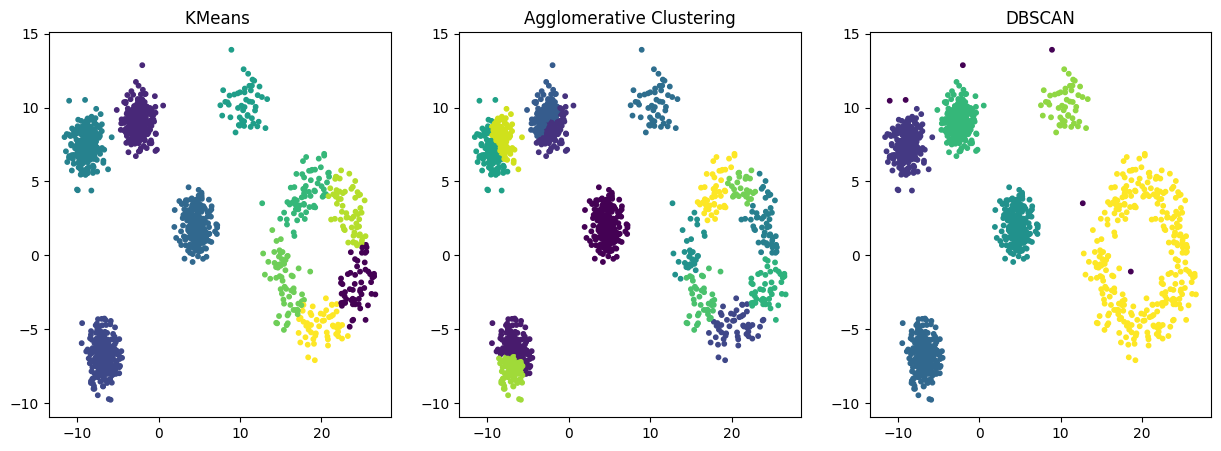

Best clustering method: DBSCAN


In [7]:
# Plot clustering results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
axes[0].set_title(f'KMeans ')

axes[1].scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=10)
axes[1].set_title('Agglomerative Clustering')

axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
axes[2].set_title('DBSCAN')

plt.show()

# Choose the best method based on silhouette scores
scores = {
    "KMeans": kmeans_score,
    "DBSCAN": dbscan_score,
    "Agglomerative": silhouette_score(X, agg_labels)
}
best_method = max(scores, key=scores.get)
print(f"Best clustering method: {best_method}")